In [64]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score, precision_recall_curve,
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, PrecisionRecallDisplay
)
from sklearn.linear_model import LogisticRegression
!pip install optuna
import optuna

In [66]:
#read in terrorism dataset
terrorism = pd.read_csv(r"C:\Users\ryanc\Downloads\gtd_full.csv")

#output the first five rows to see if the file read in correctly- IT DID!
terrorism.head()

C:\Users\ryanc\AppData\Local\Temp\ipykernel_17300\14693481.py:2: DtypeWarning: Columns (4,31,33,54,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terrorism = pd.read_csv(r"C:\Users\ryanc\Downloads\gtd_full.csv")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [67]:
#only include those terrorist attacks that met the three criteria listed in the codebook
mask = (terrorism['crit1'] == 1) & (terrorism['crit3'] == 1) & (terrorism['crit3'] == 1)
terrorism = terrorism[mask].drop(columns = ['crit1', 'crit2', 'crit3'])
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Preparing the dataset...
Dataset split completed.


[I 2024-11-14 22:32:48,201] A new study created in memory with name: no-name-987318a3-d025-48dc-b18f-990f2c1db6ea


Subset size: 50000 rows

--- Starting Bayesian Optimization for RBF Kernel ---


[I 2024-11-14 23:04:59,652] Trial 0 finished with value: 0.44645999999999997 and parameters: {'svc__C': 634.2533904546038, 'svc__gamma': 1.9900245710207835e-05}. Best is trial 0 with value: 0.44645999999999997.
[I 2024-11-14 23:20:52,827] Trial 1 finished with value: 0.49178 and parameters: {'svc__C': 0.08272480701241008, 'svc__gamma': 0.06208128911572358}. Best is trial 1 with value: 0.49178.
[I 2024-11-14 23:38:07,745] Trial 2 finished with value: 0.47951999999999995 and parameters: {'svc__C': 26.698429494044554, 'svc__gamma': 0.0009039760100913209}. Best is trial 1 with value: 0.49178.
[I 2024-11-15 07:50:51,818] Trial 3 finished with value: 0.53026 and parameters: {'svc__C': 142.48205302733385, 'svc__gamma': 0.004797386578361409}. Best is trial 3 with value: 0.53026.
[I 2024-11-15 07:56:55,407] Trial 4 finished with value: 0.45178 and parameters: {'svc__C': 2.5320445317351417, 'svc__gamma': 0.00017347679661075427}. Best is trial 3 with value: 0.53026.
[I 2024-11-15 08:06:27,157] Tr

Bayesian Optimization for RBF Kernel completed in 135060.02 seconds
Best Parameters (RBF Kernel): {'svc__C': 0.6502826241979693, 'svc__gamma': 0.09833948416311847}


C:\Users\ryanc\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Optimizing threshold using logistic regression...
Optimal Threshold (RBF Kernel): 0.57

Performance at Logistic Regression-Optimized Threshold:
Precision: 0.4953
Recall: 0.9328
F1 Score: 0.6470


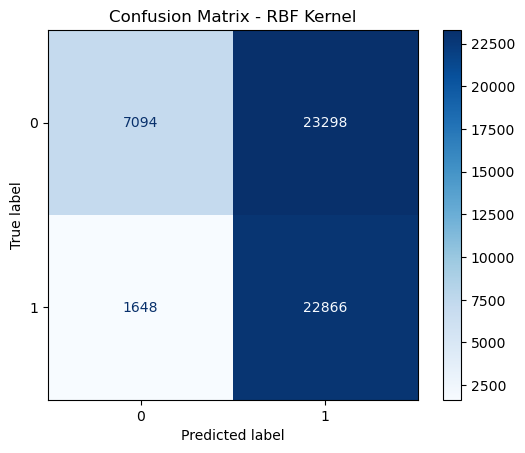

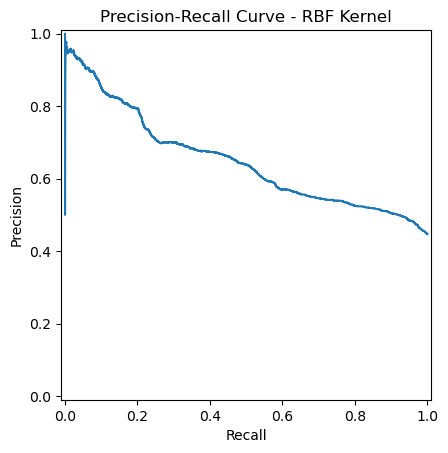

In [70]:
# RBF Kernel Code
# Dataset Preparation
print("Preparing the dataset...")
numerical_columns = ['nkillter', 'nwound', 'iyear', 'suicide', 'extended', 'success']
categorical_columns = ['attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'region_txt']

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        ]), categorical_columns)
    ]
)

# Create the target variable
terrorism['civilian_deaths'] = terrorism['nkill'].fillna(0).apply(lambda x: 1 if x > 0 else 0)

# Split the dataset into features (X) and target (y)
X = terrorism[numerical_columns + categorical_columns]
y = terrorism['civilian_deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Dataset split completed.")

# Use a Subset of the Training Set
X_train_subset, _, y_train_subset, _ = train_test_split(
    X_train, y_train, train_size=50000, random_state=42, stratify=y_train
)
print(f"Subset size: {X_train_subset.shape[0]} rows")

# RBF Kernel Pipeline
pipeline_rbf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42, max_iter=5000))
])

# Bayesian Optimization for RBF Kernel
def objective(trial):
    # Hyperparameter ranges
    C = trial.suggest_float('svc__C', 0.0001, 1000, log=True)  # Logarithmic sampling for C
    gamma = trial.suggest_float('svc__gamma', 1e-6, 1e-1, log=True)  # Logarithmic sampling for gamma
    
    # Set hyperparameters
    pipeline_rbf.set_params(svc__C=C, svc__gamma=gamma)
    
    # Cross-validation score
    return cross_val_score(pipeline_rbf, X_train_subset, y_train_subset, cv=5, scoring='accuracy', n_jobs=-1).mean()

print("\n--- Starting Bayesian Optimization for RBF Kernel ---")
start_time = time.time()
study_rbf = optuna.create_study(direction='maximize')
study_rbf.optimize(objective, n_trials=50)
end_time = time.time()
print(f"Bayesian Optimization for RBF Kernel completed in {end_time - start_time:.2f} seconds")
print(f"Best Parameters (RBF Kernel): {study_rbf.best_params}")

# Train Best RBF Model
best_rbf_params = study_rbf.best_params
pipeline_rbf.set_params(svc__C=best_rbf_params['svc__C'], svc__gamma=best_rbf_params['svc__gamma'])
pipeline_rbf.fit(X_train_subset, y_train_subset)
y_pred_proba = pipeline_rbf.predict_proba(X_test)[:, 1]

# Logistic Regression for Threshold Optimization
print("Optimizing threshold using logistic regression...")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(y_pred_proba.reshape(-1, 1), y_test)

# Predict probabilities for the optimal threshold
thresholds = np.linspace(0.1, 0.99, 50)
precision_scores, recall_scores, f1_scores = [], [], []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_threshold))
    recall_scores.append(recall_score(y_test, y_pred_threshold))
    f1_scores.append(f1_score(y_test, y_pred_threshold))

optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold (RBF Kernel): {optimal_threshold:.2f}")

# Evaluate at Optimal Threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
optimal_precision = precision_score(y_test, y_pred_optimal)
optimal_recall = recall_score(y_test, y_pred_optimal)
optimal_f1 = f1_score(y_test, y_pred_optimal)

print("\nPerformance at Logistic Regression-Optimized Threshold:")
print(f"Precision: {optimal_precision:.4f}")
print(f"Recall: {optimal_recall:.4f}")
print(f"F1 Score: {optimal_f1:.4f}")

# Confusion Matrix
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
disp_optimal = ConfusionMatrixDisplay(confusion_matrix=cm_optimal, display_labels=[0, 1])
disp_optimal.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - RBF Kernel")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve - RBF Kernel")
plt.show()